<a href="https://colab.research.google.com/github/nfamartins/mypack/blob/master/analise_expl_lattes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Definindo um diretório base

In [3]:
import os
base_dir = '/content/drive/MyDrive/Projetos/each/sin5007'
os.chdir(base_dir)

Importando bibliotecas

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importando dados

In [15]:
# tabela com as variáveis iniciais a serem pesquisadas
docs = pd.read_csv('out/docs.csv', dtype = {'id_lattes':object,'nome_completo':object,
                                            'uf_nascimento': object, 'pais_nascimento': object,
                                            'nacionalidade': object, 'grande_area': object,
                                            'n_papers': int, 'n_orientacoes': int,'n_posdoc':int,'classe':int})

In [16]:
#verificando
docs.head()

,id_lattes,nome_completo,uf_nascimento,pais_nascimento,nacionalidade,grande_area,n_papers,n_orientacoes,n_posdoc,classe
0,0000039015885890,Tárcio de Almeida Vieira,BA,Brasil,B,CIENCIAS_EXATAS_E_DA_TERRA,9,0,4,0
1,0000104116232000,Andre Zuber,PR,Brasil,B,ENGENHARIAS,8,9,1,0
2,0000111305956227,Tecia Vieira Carvalho,PI,Brasil,B,CIENCIAS_EXATAS_E_DA_TERRA,17,41,1,0
3,0000174385402367,Juliana Vieira de Freitas,SP,Brasil,B,ENGENHARIAS,5,0,0,0
4,0000183606503103,Luiza Cristina Lacerda,GO,Brasil,B,CIENCIAS_BIOLOGICAS,4,9,0,0


# Descrevendo o dataset

O dataset consiste em dados que possam ser relevantes para análise de doutores que permaneceram na academia. Ou seja, se após concluírem o doutorado fizeram carreira acadêmica como professores universitários. Assim, as classes que queremos modelar (classe) é 1 para os indivíduos que permanecem na academia e 2 para os que não permanecem.

A fonte dos dados são os inputs pessoais na plataforma Lattes. Nesta análise inicial iremos trabalhar com 7 características:

- UF de nascimento (variável categórica nominal)
- País de nascimento (variável categórica nominal)
- Nacionalidade (variável categórica binária [B/E]
- Área de atuação (variável categórica nominal)
- Número de papers publicados (variável racional)
- Número de orientações (variável racional)
- Número de pós doc (variável racional)



In [17]:
docs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373590 entries, 0 to 373589
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id_lattes        373590 non-null  object
 1   nome_completo    373590 non-null  object
 2   uf_nascimento    332587 non-null  object
 3   pais_nascimento  373589 non-null  object
 4   nacionalidade    373590 non-null  object
 5   grande_area      343019 non-null  object
 6   n_papers         373590 non-null  int64 
 7   n_orientacoes    373590 non-null  int64 
 8   n_posdoc         373590 non-null  int64 
 9   classe           373590 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 28.5+ MB


In [18]:
len(docs.dropna())

306787

O banco total possui 373.590 instâcias, das quais 306.787 não possui nenhum missing value.

## Classes

In [80]:
100*docs['classe'].isnull().sum()/len(docs)

0.0

A variável informa o rótulo (classe) do indivíduo, possui 0% de missing values.

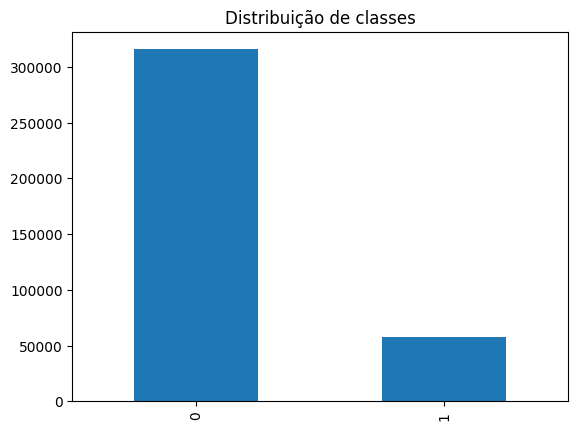

In [81]:
# gráfico
docs['classe'].value_counts().plot(kind='bar')
plt.title('Distribuição de classes')
plt.show()

## Características

### UF de nascimento

In [ ]:
100*docs['uf_nascimento'].isnull().sum()/len(docs)

10.97540084049359

A variável informa o UF de origem do indivíduo, possui ~11% de missing values.

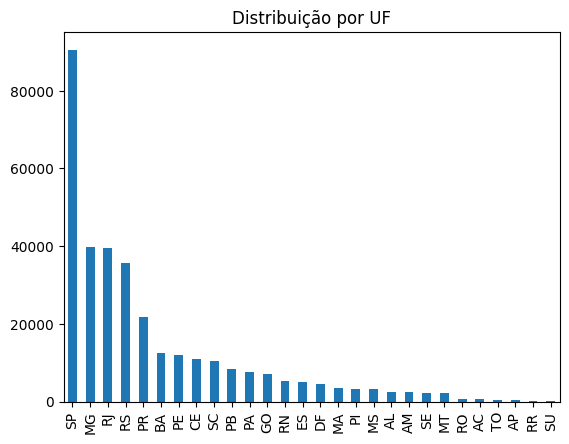

In [ ]:
# gráfico
docs['uf_nascimento'].value_counts().plot(kind='bar')
plt.title('Distribuição por UF')
plt.show()

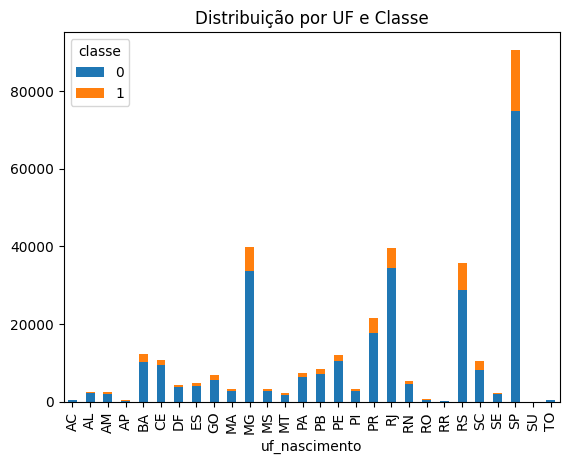

In [ ]:
# gráfico com classe
pd.crosstab(docs['uf_nascimento'], docs['classe']).plot(kind='bar', stacked=True)
plt.title('Distribuição por UF e Classe')
plt.show()

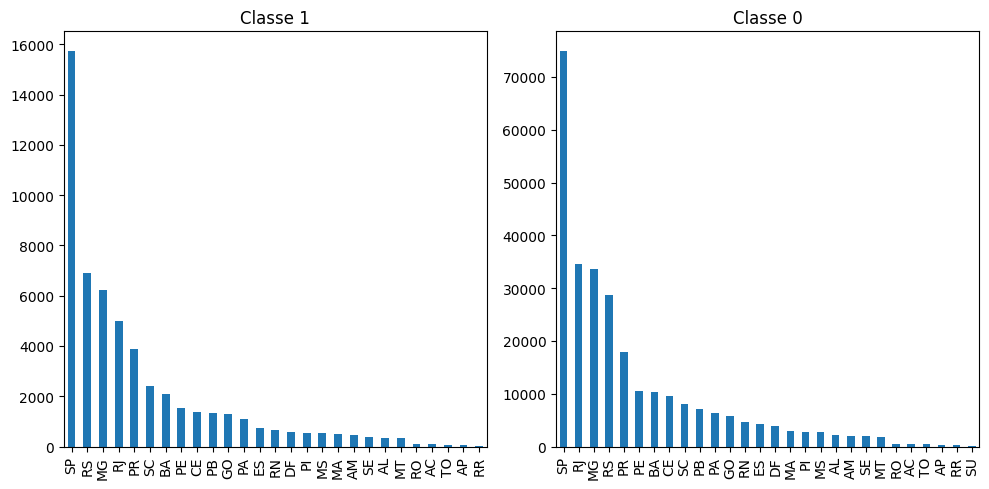

In [ ]:
plt.figure(figsize=(10, 5))
# classe == 1
plt.subplot(1, 2, 1)
docs[docs['classe'] == 1]['uf_nascimento'].value_counts().plot(kind='bar')
plt.title('Classe 1')

# classe == 0
plt.subplot(1, 2, 2)
docs[docs['classe'] == 0]['uf_nascimento'].value_counts().plot(kind='bar')
plt.title('Classe 0')

# Ajusta a organização dos gráficos
plt.tight_layout()

# Exibe os gráficos
plt.show()

### País de nascimento

In [30]:
100*docs['pais_nascimento'].isnull().sum()/len(docs)

0.0002676731175888006

A variável informa o UF de origem do indivíduo, possui ~0% de missing values.

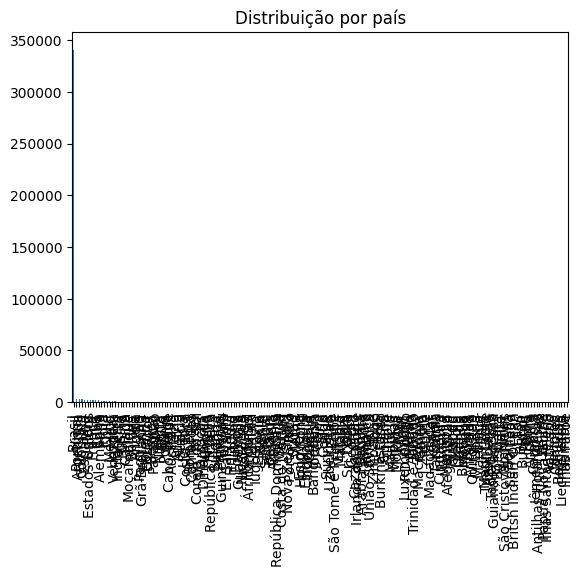

In [31]:
# gráfico
docs['pais_nascimento'].value_counts().plot(kind='bar')
plt.title('Distribuição por país')
plt.show()

São muitos os países que aparecem no banco, iremos utilizar apenas a variável de nacionalidade (B/E)

### Nacionalidade

In [32]:
100*docs['nacionalidade'].isnull().sum()/len(docs)

0.0

A variável informa o UF de origem do indivíduo, possui ~0% de missing values.

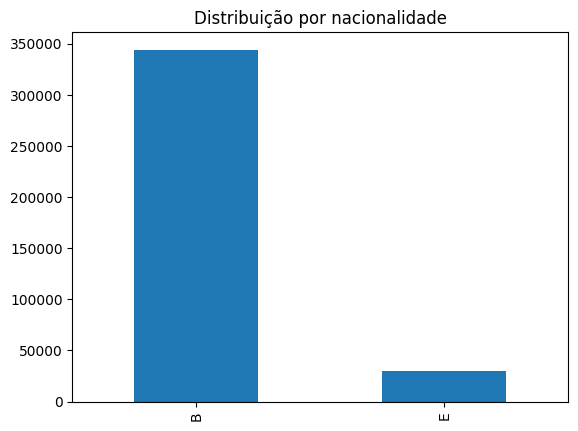

In [33]:
# gráfico
docs['nacionalidade'].value_counts().plot(kind='bar')
plt.title('Distribuição por nacionalidade')
plt.show()

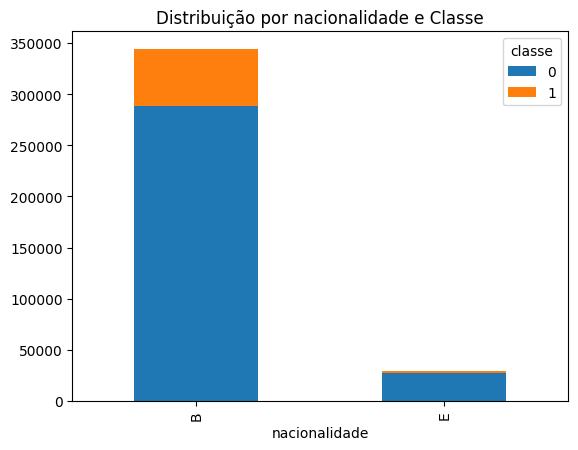

In [34]:
# gráfico com classe
pd.crosstab(docs['nacionalidade'], docs['classe']).plot(kind='bar', stacked=True)
plt.title('Distribuição por nacionalidade e Classe')
plt.show()

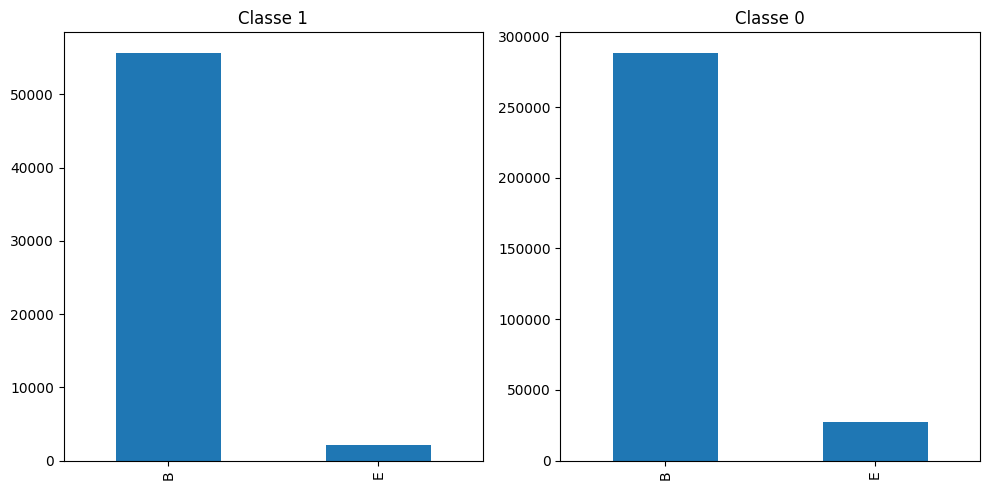

In [35]:
plt.figure(figsize=(10, 5))
# classe == 1
plt.subplot(1, 2, 1)
docs[docs['classe'] == 1]['nacionalidade'].value_counts().plot(kind='bar')
plt.title('Classe 1')

# classe == 0
plt.subplot(1, 2, 2)
docs[docs['classe'] == 0]['nacionalidade'].value_counts().plot(kind='bar')
plt.title('Classe 0')

# Ajusta a organização dos gráficos
plt.tight_layout()

# Exibe os gráficos
plt.show()

### Area de atuação

In [36]:
100*docs['grande_area'].isnull().sum()/len(docs)

8.183034877807222

A variável informa o UF de origem do indivíduo, possui ~8% de missing values.

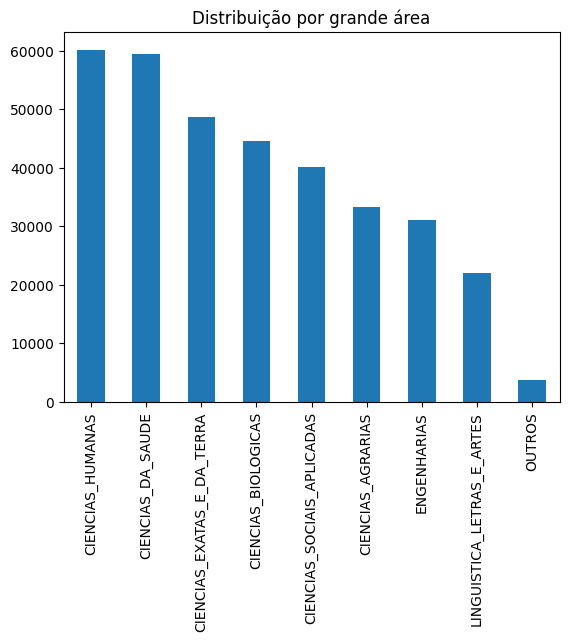

In [37]:
# gráfico
docs['grande_area'].value_counts().plot(kind='bar')
plt.title('Distribuição por grande área')
plt.show()

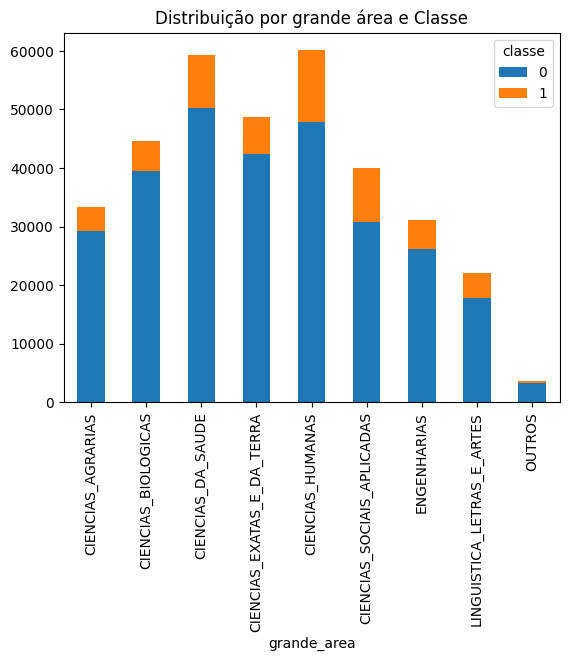

In [38]:
# gráfico com classe
pd.crosstab(docs['grande_area'], docs['classe']).plot(kind='bar', stacked=True)
plt.title('Distribuição por grande área e Classe')
plt.show()

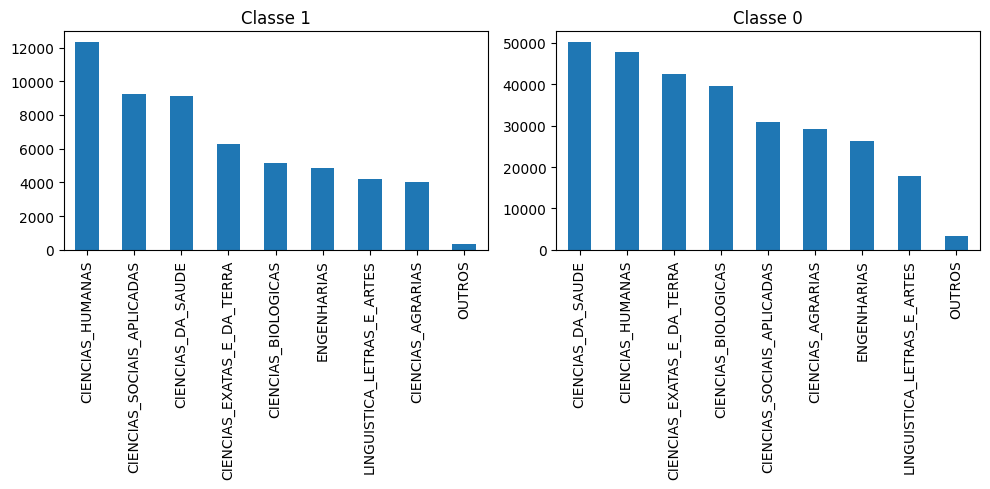

In [39]:
plt.figure(figsize=(10, 5))
# classe == 1
plt.subplot(1, 2, 1)
docs[docs['classe'] == 1]['grande_area'].value_counts().plot(kind='bar')
plt.title('Classe 1')

# classe == 0
plt.subplot(1, 2, 2)
docs[docs['classe'] == 0]['grande_area'].value_counts().plot(kind='bar')
plt.title('Classe 0')

# Ajusta a organização dos gráficos
plt.tight_layout()

# Exibe os gráficos
plt.show()

### Papers publicados

In [40]:
100*docs['n_papers'].isnull().sum()/len(docs)

0.0

A variável informa a quantidade de papers publicados pelo indivíduo, possui ~0% de missing values.

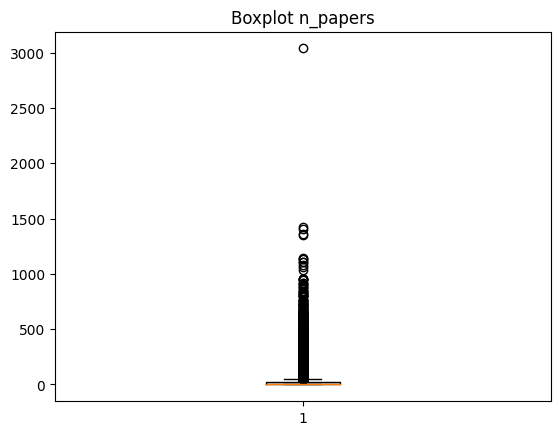

In [44]:
# boxplot
plt.boxplot(docs['n_papers'])
plt.title('Boxplot n_papers')
plt.show()

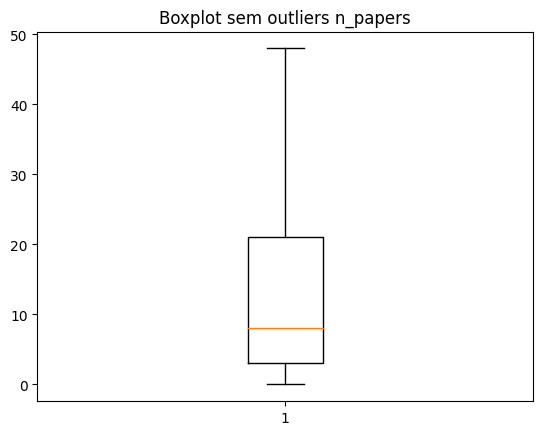

In [45]:
# boxplot sem outliers
plt.boxplot(docs['n_papers'], showfliers=False)
plt.title('Boxplot sem outliers n_papers')
plt.show()

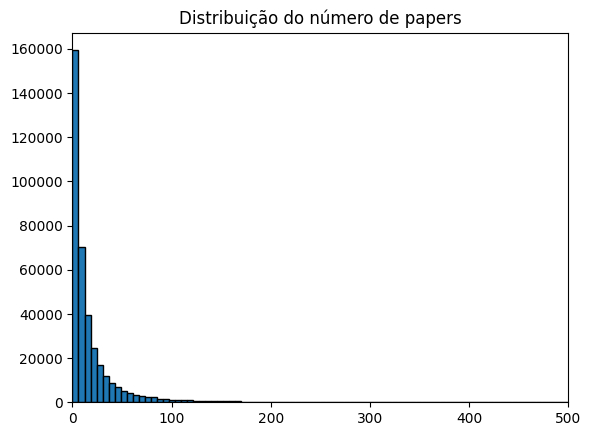

In [43]:
# histograma
plt.hist(docs['n_papers'], bins=500, edgecolor='k')
plt.title('Distribuição do número de papers')
plt.xlim(0, 500)
plt.show()

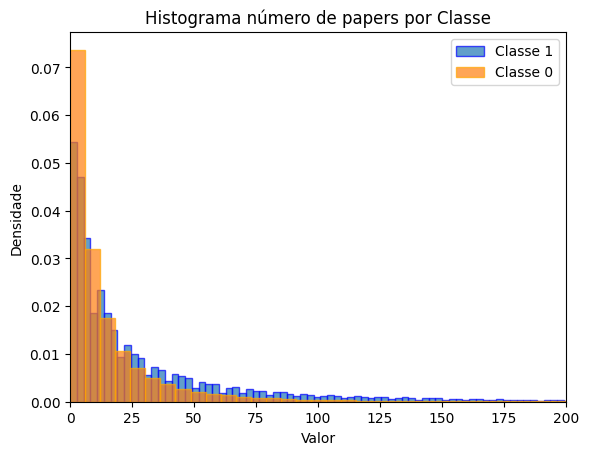

In [55]:
# Cria o histograma para a classe 1
plt.hist(docs[docs['classe'] == 1]['n_papers'], bins=500, edgecolor='blue', alpha=0.7, label='Classe 1', density=True)

# Cria o histograma para a classe 0
plt.hist(docs[docs['classe'] == 0]['n_papers'], bins=500, edgecolor='orange', alpha=0.7, label='Classe 0', density=True)

plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.title('Histograma número de papers por Classe')
plt.legend()
plt.xlim(0, 200)
plt.show()

### Orientações

In [56]:
100*docs['n_orientacoes'].isnull().sum()/len(docs)

0.0

A variável informa a quantidade de orientações do indivíduo, possui ~0% de missing values.

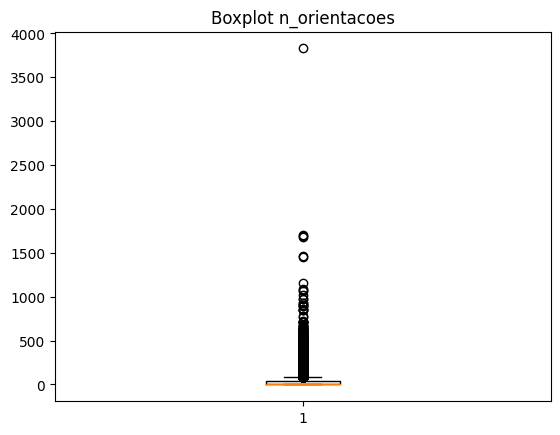

In [57]:
# boxplot
plt.boxplot(docs['n_orientacoes'])
plt.title('Boxplot n_orientacoes')
plt.show()

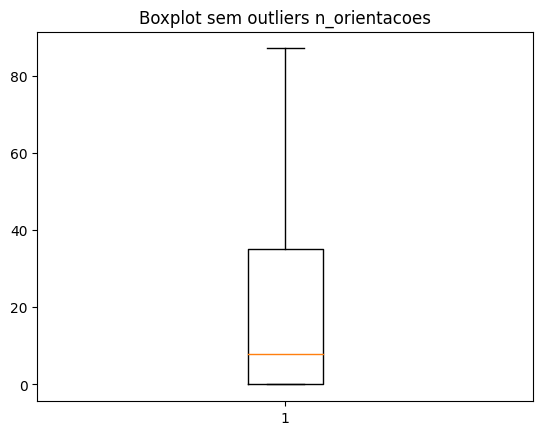

In [58]:
# boxplot sem outliers
plt.boxplot(docs['n_orientacoes'], showfliers=False)
plt.title('Boxplot sem outliers n_orientacoes')
plt.show()

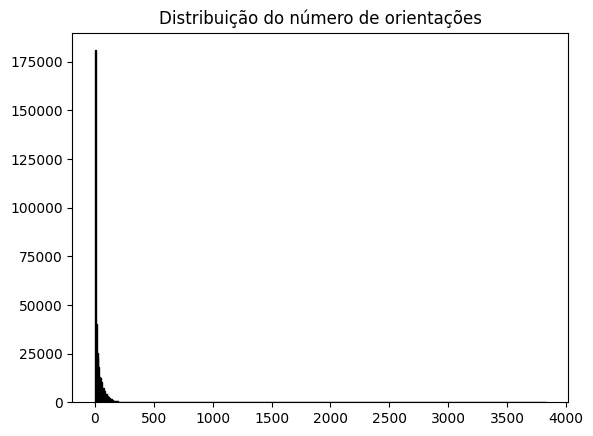

In [60]:
# histograma
plt.hist(docs['n_orientacoes'], bins=500, edgecolor='k')
plt.title('Distribuição do número de orientações')
plt.show()

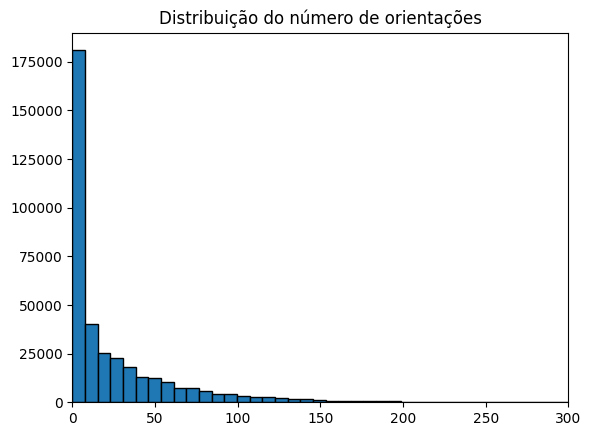

In [62]:
# histograma
plt.hist(docs['n_orientacoes'], bins=500, edgecolor='k')
plt.title('Distribuição do número de orientações')
plt.xlim(0, 300)
plt.show()

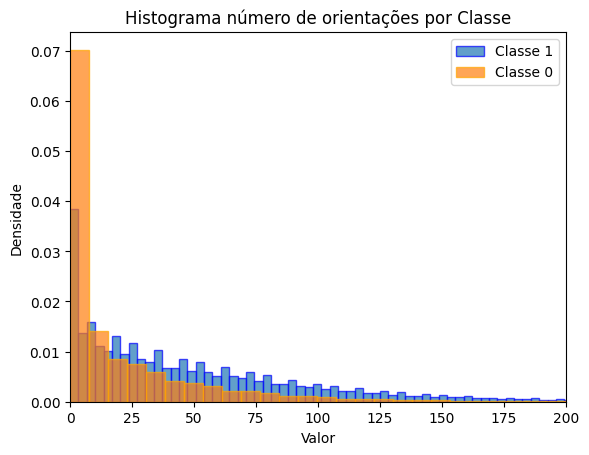

In [79]:
# Cria o histograma para a classe 1
plt.hist(docs[docs['classe'] == 1]['n_orientacoes'], bins=500, edgecolor='blue', alpha=0.7, label='Classe 1', density=True)

# Cria o histograma para a classe 0
plt.hist(docs[docs['classe'] == 0]['n_orientacoes'], bins=500, edgecolor='orange', alpha=0.7, label='Classe 0', density=True)

plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.title('Histograma número de orientações por Classe')
plt.legend()
plt.xlim(0, 200)
plt.show()

### Pós-doc

In [64]:
100*docs['n_posdoc'].isnull().sum()/len(docs)

0.0

A variável informa a quantidade de pós doc dos indivíduos, possui ~0% de missing values.

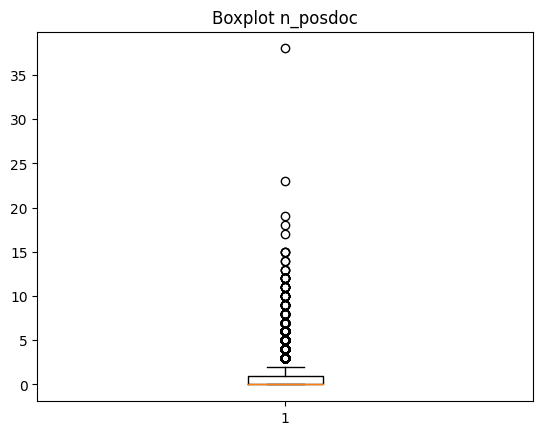

In [65]:
# boxplot
plt.boxplot(docs['n_posdoc'])
plt.title('Boxplot n_posdoc')
plt.show()

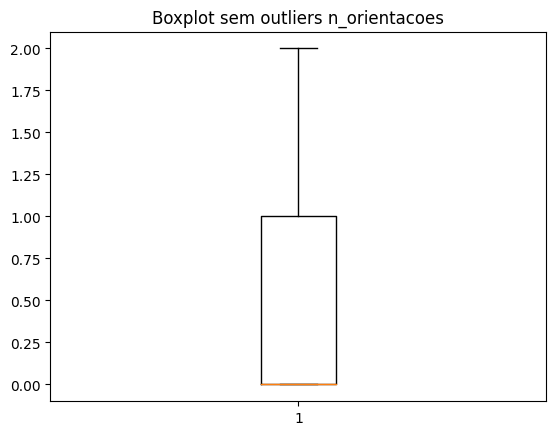

In [66]:
# boxplot sem outliers
plt.boxplot(docs['n_posdoc'], showfliers=False)
plt.title('Boxplot sem outliers n_orientacoes')
plt.show()

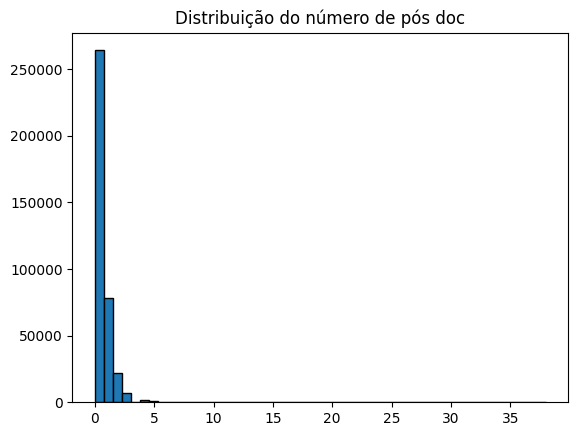

In [70]:
# histograma
plt.hist(docs['n_posdoc'], bins=50, edgecolor='k')
plt.title('Distribuição do número de pós doc')
plt.show()

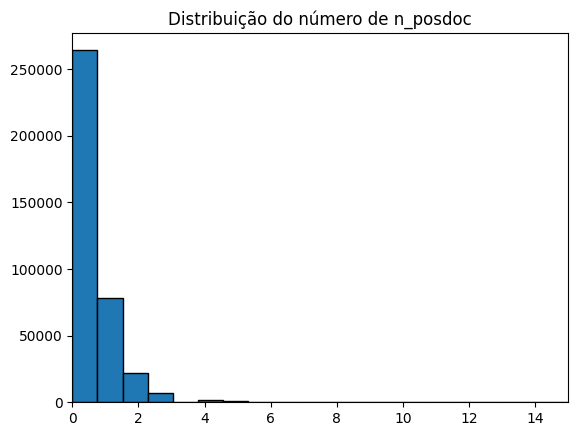

In [71]:
# histograma
plt.hist(docs['n_posdoc'], bins=50, edgecolor='k')
plt.title('Distribuição do número de n_posdoc')
plt.xlim(0, 15)
plt.show()

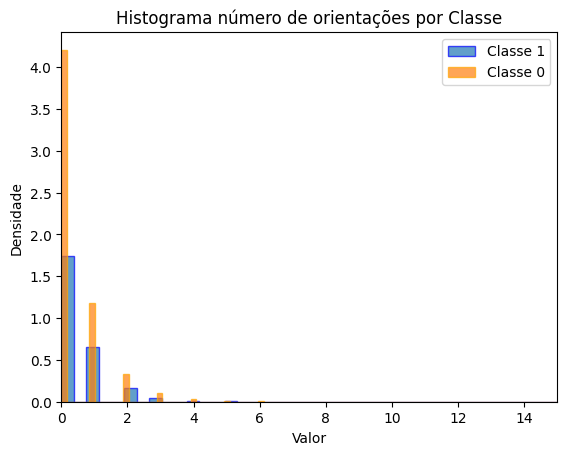

In [78]:
# Cria o histograma para a classe 1
plt.hist(docs[docs['classe'] == 1]['n_posdoc'], bins=100, edgecolor='blue', alpha=0.7, label='Classe 1', density=True)

# Cria o histograma para a classe 0
plt.hist(docs[docs['classe'] == 0]['n_posdoc'], bins=100, edgecolor='orange', alpha=0.7, label='Classe 0', density=True)

plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.title('Histograma número de orientações por Classe')
plt.legend()
plt.xlim(0, 15)
plt.show()

### Papers vs Orientações

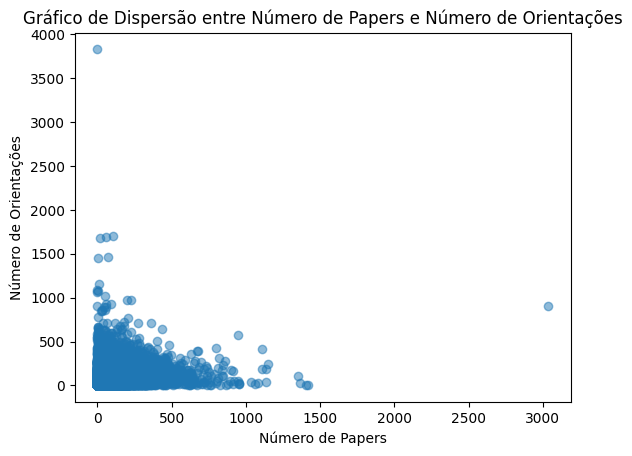

In [82]:
# scatter
plt.scatter(docs['n_papers'], docs['n_orientacoes'], alpha=0.5)
plt.xlabel('Número de Papers')
plt.ylabel('Número de Orientações')
plt.title('Gráfico de Dispersão entre Número de Papers e Número de Orientações')

plt.show()

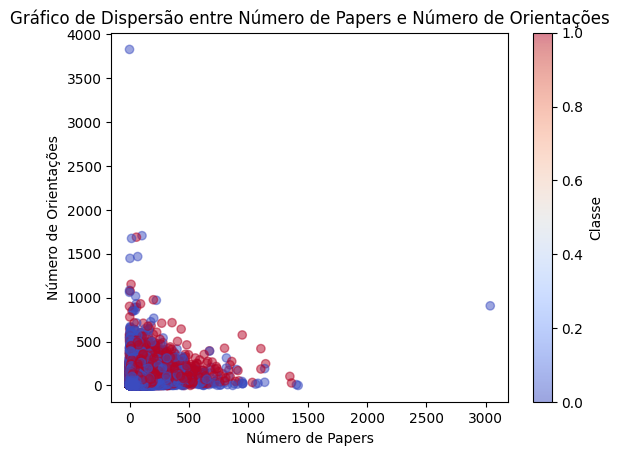

In [90]:
# scatter
plt.scatter(docs['n_papers'], docs['n_orientacoes'], alpha=0.5, c=docs['classe'], cmap='coolwarm')
plt.xlabel('Número de Papers')
plt.ylabel('Número de Orientações')
plt.title('Gráfico de Dispersão entre Número de Papers e Número de Orientações')
plt.colorbar(label='Classe')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


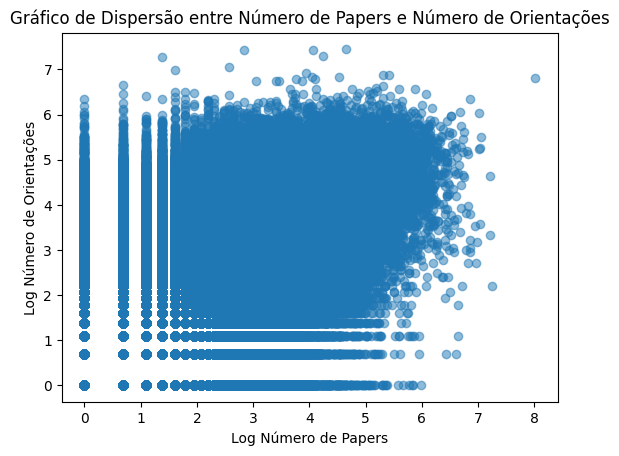

In [86]:
# scatter log log
plt.scatter(np.log(docs['n_papers']), np.log(docs['n_orientacoes']), alpha=0.5)
plt.xlabel('Log Número de Papers')
plt.ylabel('Log Número de Orientações')
plt.title('Gráfico de Dispersão entre Número de Papers e Número de Orientações')

plt.show()

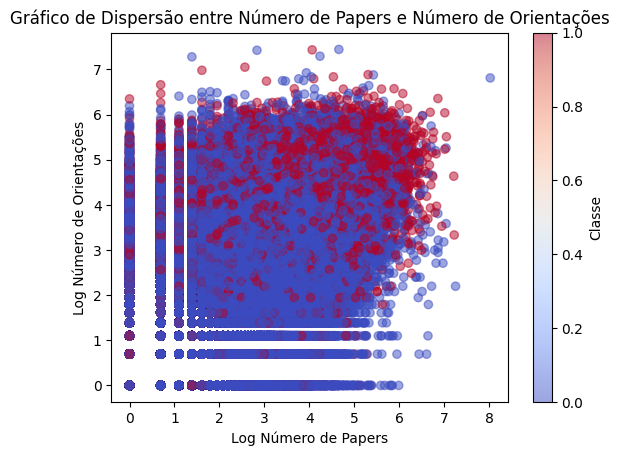

In [88]:
# scatter log log
plt.scatter(np.log(docs['n_papers']), np.log(docs['n_orientacoes']), alpha=0.5, c=docs['classe'], cmap='coolwarm')
plt.xlabel('Log Número de Papers')
plt.ylabel('Log Número de Orientações')
plt.title('Gráfico de Dispersão entre Número de Papers e Número de Orientações')
plt.colorbar(label='Classe')

plt.show()

### Papers vs pós doc

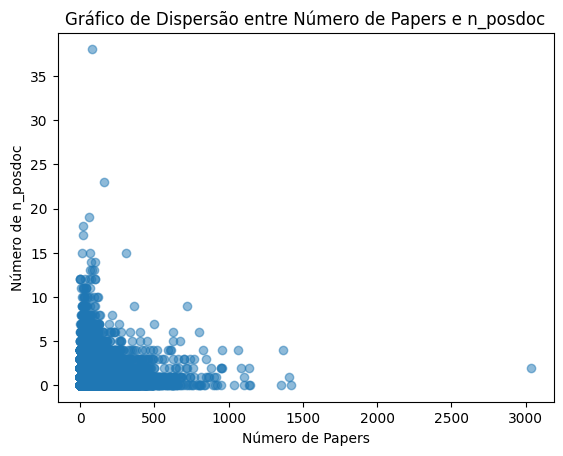

In [91]:
# scatter
plt.scatter(docs['n_papers'], docs['n_posdoc'], alpha=0.5)
plt.xlabel('Número de Papers')
plt.ylabel('Número de n_posdoc')
plt.title('Gráfico de Dispersão entre Número de Papers e n_posdoc')

plt.show()

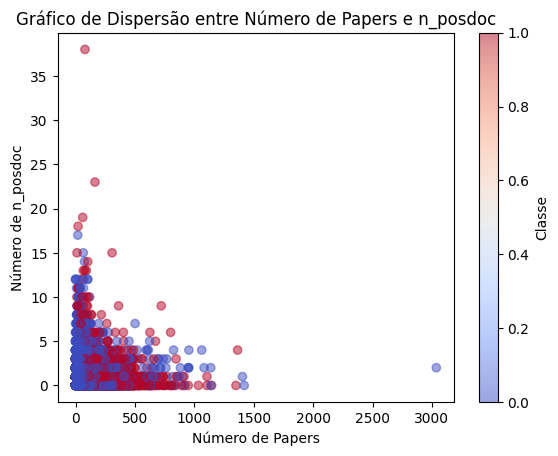

In [92]:
# scatter
plt.scatter(docs['n_papers'], docs['n_posdoc'], alpha=0.5, c=docs['classe'], cmap='coolwarm')
plt.xlabel('Número de Papers')
plt.ylabel('Número de n_posdoc')
plt.title('Gráfico de Dispersão entre Número de Papers e n_posdoc')
plt.colorbar(label='Classe')
plt.show()

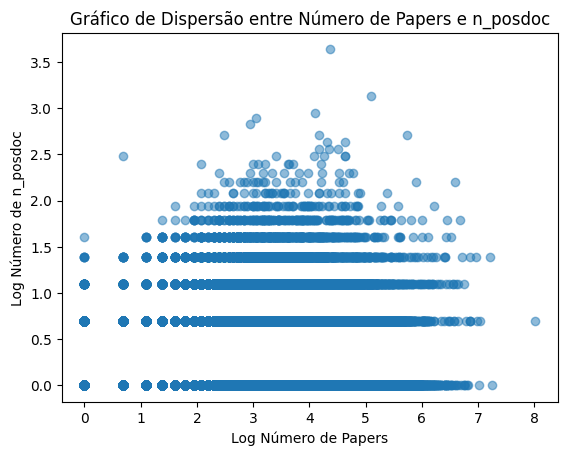

In [93]:
# scatter log log
plt.scatter(np.log(docs['n_papers']), np.log(docs['n_posdoc']), alpha=0.5)
plt.xlabel('Log Número de Papers')
plt.ylabel('Log Número de n_posdoc')
plt.title('Gráfico de Dispersão entre Número de Papers e n_posdoc')

plt.show()

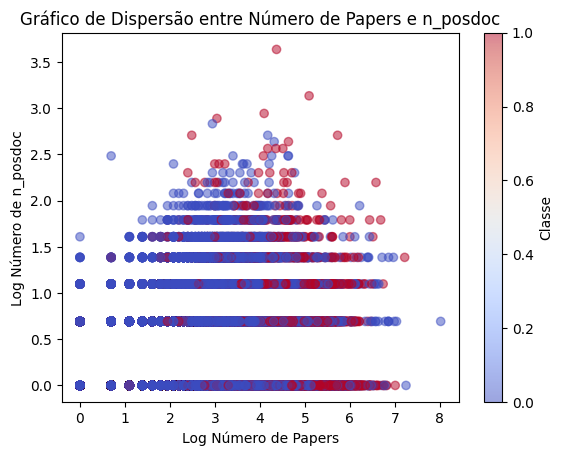

In [94]:
# scatter log log
plt.scatter(np.log(docs['n_papers']), np.log(docs['n_posdoc']), alpha=0.5, c=docs['classe'], cmap='coolwarm')
plt.xlabel('Log Número de Papers')
plt.ylabel('Log Número de n_posdoc')
plt.title('Gráfico de Dispersão entre Número de Papers e n_posdoc')
plt.colorbar(label='Classe')

plt.show()

### Orientações vs pós doc

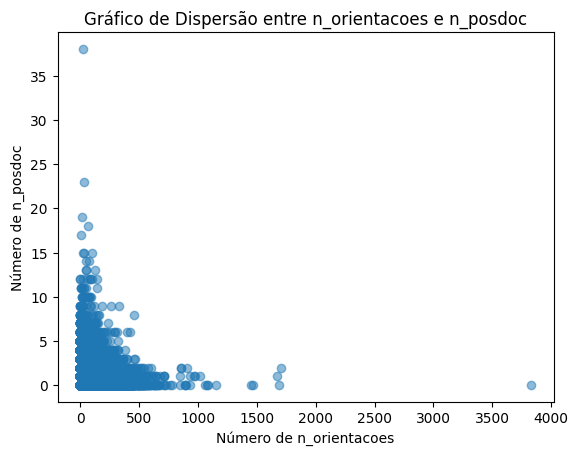

In [96]:
# scatter
plt.scatter(docs['n_orientacoes'], docs['n_posdoc'], alpha=0.5)
plt.xlabel('Número de n_orientacoes')
plt.ylabel('Número de n_posdoc')
plt.title('Gráfico de Dispersão entre n_orientacoes e n_posdoc')

plt.show()

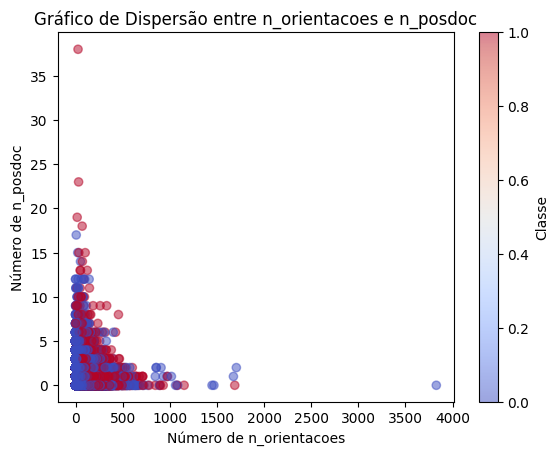

In [97]:
# scatter
plt.scatter(docs['n_orientacoes'], docs['n_posdoc'], alpha=0.5, c=docs['classe'], cmap='coolwarm')
plt.xlabel('Número de n_orientacoes')
plt.ylabel('Número de n_posdoc')
plt.title('Gráfico de Dispersão entre n_orientacoes e n_posdoc')
plt.colorbar(label='Classe')
plt.show()

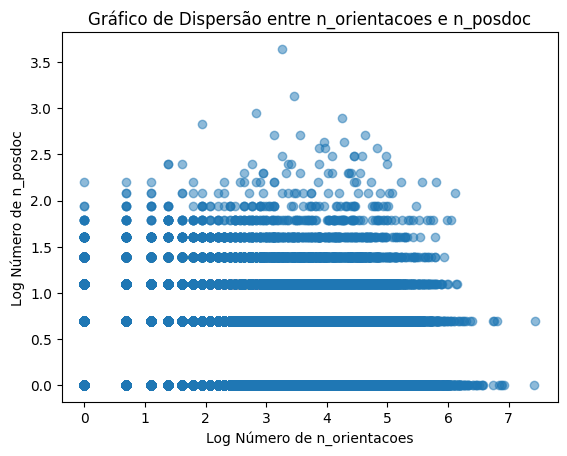

In [98]:
# scatter log log
plt.scatter(np.log(docs['n_orientacoes']), np.log(docs['n_posdoc']), alpha=0.5)
plt.xlabel('Log Número de n_orientacoes')
plt.ylabel('Log Número de n_posdoc')
plt.title('Gráfico de Dispersão entre n_orientacoes e n_posdoc')

plt.show()

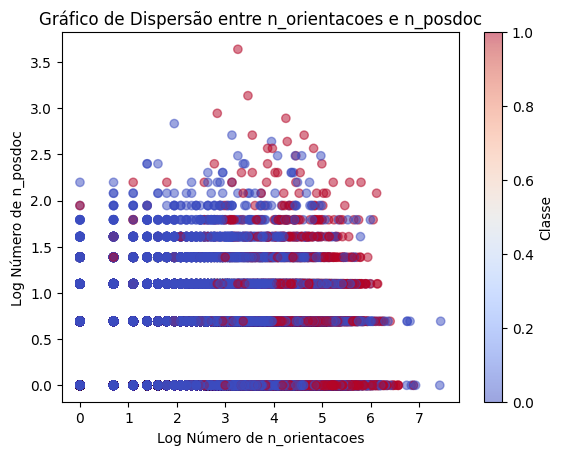

In [99]:
# scatter log log
plt.scatter(np.log(docs['n_orientacoes']), np.log(docs['n_posdoc']), alpha=0.5, c=docs['classe'], cmap='coolwarm')
plt.xlabel('Log Número de n_orientacoes')
plt.ylabel('Log Número de n_posdoc')
plt.title('Gráfico de Dispersão entre n_orientacoes e n_posdoc')
plt.colorbar(label='Classe')

plt.show()

# Problemas/discussões

- Outras características disponíveis para tratamento e análises
- Análise temporal
  - Como comparar indivíduos com tempo de experiência diferentes
  - Levantar valores por ano? Outro recorte?
  - Normalizar os anos para o ano de início/fim do doc? (ano 0, ano 1, ...)
  - Qtd. de papers/pós doc até "entrar na academia"?
  - Fazer recortes por "idade", ranges de ano de gradução por exemplo
- Aprimorar a definição/categorização de quem "permanece" na academia
- Adicionar variável de gênero

- Qualidade
  - Cruzar com dados de relevância de papers/revistas?
  - ranking de universidades
    - universidade pública vs estadual?